# Week 5

Phew. You've handed in the assignment. But there's no resting now. We're just hitting out grove, so let's get going!! Much to get through today.

## The plan for today

We continue learning about dataviz by focusing on data with two variables and their relationships. The lecture today has the following parts:
* In part 1, we talk about exploring data with two variables, make some logarithmic plots and think about what we have read in DAOST.
* Then, in part 2, we use sklearn and have fun with linear regression.

Ok. Now it's time to get started.

## Part 1: Exploratory data visualzation, two variables  

I told you how I love the Data Analysis with Open Source Tools book. If you managed to read Chapter 3, which is about visualizing data with two variables, before coming to class today it's great. If you haven't yet, this is the time to do it! 

*Reading*: DAOST Chapter 3 up to *Graphical Analysis and Presentation Graphics* on page 68 in the PDF. **You can find it on Teams in the** `files` **tab**.

And now a few exercises to reflect on the text:


*Exercise:* Questions from DAOST Chapter 3. 

> * Looking at Fig 3-1, Janert writes "the data itself shows clearly that the amount of random noise in the data is small". What do you think his argument is?
> * Can you think of a real-world example of a multivariate relationship like the one in Fig 3-3 (lower right panel)?
> * What are the two methods Janert metions for smoothing noisy data? Can you think of other ones?
> * What are residuals? Why is it a good idea to plot the residuals of your fit?
> * Explain in your own words the point of the smooth tube in figure 3-7.
> * What the h#ll is banking and what part of our visual system does it use to help us see patterns? What are potential problems with banking?
> * Summarize the discussion of Graphical Analysis and Presentation Graphics on pp. 68-69 in your own words.

<div class="alert alert-block alert-info">
Read the text and answer the questions to make sure you get it. No need for LLMs here
</div>

### Answers

- His argument is that there are no outliers and that the curve is so smooth. This indicates that there is no noise in the data.
- My first thought was the development of a fetus; time on the x axis and something about chromosomes on the y-axis. In the very early stages, the cells are simple organisms and then at one point, the DNA starts to create a Y chromosome if the fetus is a male (XY), while if it is a female, the Y chromosome is not developed (XX). (obviously I'm not a biologist so there are more complicated steps involved)
- Weighted splines and LOESS (Locally Weighted Regression). Other ones that come to my mind are Gaussian kernels, but these are very similar to LOESS.
- Residuals are the remainder when you subtract the smooth trend from the actual data. It's clever to inspect them because they will suggest if the model you're using is appropriate or not. If the residuals aren't evenly distributed, the model might be overfitted to some of the data.
- The idea is to split the dataset into two groups; upper and lower residuals. Then you calculate another smooth curve for each class seperately. You will then see how the width of the bands change along the curve.
- Banking is related to the actual visualisation of the data (you're not changing the actual data, only the looks of it). It's a graphical method. Janert says that we can recognize change most easily if they make approximately a 45 degree angle on a graph. I'm guessing this has something to do with how the human eye works. So the idea of banking is to "stretct out/in" the axis, so that the changes on the data have this 45 degree angle, and not huge spikes with ~80 degrees. However Janert doesn't prefer this model, as he thinks it loses too much detail and the data becomes difficult to compare from the far-left side to the far-right side. So he suggests another method that he prefers, which is a *cut and stack* plot, which "cuts" the dataset into groups (e.g. centuries) and then stacks them on eachother instead, kinda like a `plt.subplots`. 
- The discussion is about the difference between graphical analysis and presentation graphics. I belive it is very similar to *explore* and *explain* which we talked about in the earlier weeks.
    - The explore (or graphical analysis) phase is where you as a analyst is digging into the data. You're working with making different plots, you're trying out different methods to find patterns. This is an investigation phase, where everything is allowed, and where you're not supposed to be too nit-picky about the details. You don't have to put labels, titles and nice explanations on your plots, because you know what you're plotting (Although I'm not sure if Sune agrees on this)
    - The explain (or presentation graphics) phase is where you have done all the analysis work, and now you're trying to explain it to an audience. You need graphs that talk for themselves. You must include meaningful labels on the axis, titles on the plots, ensure that you're using subplots when applicate and so on. Think about what fonts you're choosing, consider the ink-ratio, explain any errors that are important and that you'd like to highlight and so on. If they're supposed to be printed, use scalable formats such as PDF. Pay attention to the details. It might help to find inspiration out in the field and see what you like, and why you like it, and then use that way of plotting - after all it's also about a matter of taste.

Ok. Let's briefly talk about logarithms and logarithimic plots (if you take my networks class in the fall semester you'll se lots of loglog plots since they're important for understanding a key property of networks).

*Exercise 2.2*: Logarithms and logarithmic plots. 

> * First, a couple of questions:
>    * What kind of relationships will a semi-log plot help you discover? <font color=gray>First think, use your brain to answer, then it's OK to get further inspiration from your LLM. The same goes for the next little question.</font>
>    * What kind of functions will loglog plots help you see?
> * Second, create a version of [this plot](https://github.com/suneman/socialdata2022/blob/main/files/CrimeOccurrencesByCategory.png) from Week 1, where you display the $y$-axis on log-scale. Comment on what the plot looks like. Do any new insights arise?
> * Third, let's also try a loglog plot. Inspired by [this article](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0183110) I would expect that especially theft could be characterized by a power law distribution also in San Francisco. Let's see if I'm right. <font color=gray>It's OK use LLMs as much as you can for this one</font>
>   - *Step 1:* Divide San Francisco into a grid **roughly** $100m \times 100m$. You can, for example use numpy to do this, I would call `np.histogram2d`, and searching the internet, it seems that there are also [ways to do this in pandas](https://stackoverflow.com/questions/39254704/pandas-group-bins-of-data-per-longitude-latitude). The earth isn't flat,so `lat,` `lon` aren't really squares, but it is OK to ignore. 
>       * **Hint 1**. I really mean approximately 100 meters. It can also be 200 meters. Or 80 meters. Or 300.
>       * **Hint 2**. Ignore outliers. We only want points that are on the SF peninsula
>       * **Hint 3**. If you want help, plus see how this is done with all the bells and whistles, we've made a little example of how you can do the binning. Get it [here](https://github.com/suneman/socialdata2022/blob/main/lectures/Week5_binning.ipynb).
>       * **Hint 4**. Ask your LLM.
>   - *Step 2:* Count the number of thefts occurring within each grid-square (use all data for all time).
>   - *Step 3:* Tally the counts. Count the number of squares with $k=0$ thefts. We call this $N(0)$. Next, count the number of grids with one crime to get $N(k=1)$. Keep going like this all the way up to $k=C_{max}$, where $C_{max}$ is the highest count of crimes you find in any grid space. 
>     * *Extra tip*: If you want all the details on binning for loglog axes, you can check out [Lecture 2, Part 3](https://github.com/SocialComplexityLab/socialgraphs2021/blob/main/lectures/Week2.ipynb) in my social graphs course.
>   - *Step 4:* Plot the distribution of $k+1$ vs $N(k)$ on linear axes.
>   - *Step 5:* Plot the distribution of $k+1$ vs $N(k)$ on loglog axes.
>   - *Step 6:* Answer the question. Was Sune correct in assuming that there is a power-law distribution of theft?

<div class="alert alert-block alert-info">
LLM notes are in gray in the text
</div>

### Answers to first

- Semi-log plot will help you discover relative changes, due to the fact that all changes have the same size no matter how larege the corresponding absolute change (Example with stock-charts). Semi-log plots only plot on one axis (usually Y). 
- Loglog plots help you see power-law relationships by turning plots into straight lines (Heartbeat and mammal example). Loglog plots plot on both axis, x and y.

> LLM answer:
> #### **Summary of Uses**
> | Plot Type  | Axis Scaling | Identifies |
> |------------|-------------|-------------|
> | **Semi-Log** | One axis is logarithmic | **Exponential relationships** ($y = A e^{Bx}$) |
> | **Log-Log** | Both axes are logarithmic | **Power-law relationships** ($y = Ax^B$) |

In [163]:
#packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from math import radians, cos, sin, asin, sqrt
from scipy.stats import linregress
from sklearn import linear_model

In [2]:
# load the combined dataset
df = pd.read_csv('../res/ALL_CRIMES_SF_combined_police_reportst_2003_to_present.csv')
df['FullDate'] = pd.to_datetime(df['FullDate'])
df.head()

,FullDate,FullTime,Category,PdDistrict,Longitude,Latitude,TimeOfDay,DayOfWeek,DayOfMonth,Month,Year
0,2004-11-22,17:50,ROBBERY,INGLESIDE,-122.420084,37.708311,17,Monday,22,November,2004
1,2005-10-18,20:00,VEHICLE THEFT,PARK,-120.500000,90.000000,20,Tuesday,18,October,2005
2,2004-02-15,02:00,VEHICLE THEFT,SOUTHERN,-120.500000,90.000000,2,Sunday,15,February,2004
3,2011-02-18,05:27,ARSON,INGLESIDE,-122.436220,37.724377,5,Friday,18,February,2011
4,2010-11-21,17:00,ASSAULT,SOUTHERN,-122.410541,37.770913,17,Sunday,21,November,2010


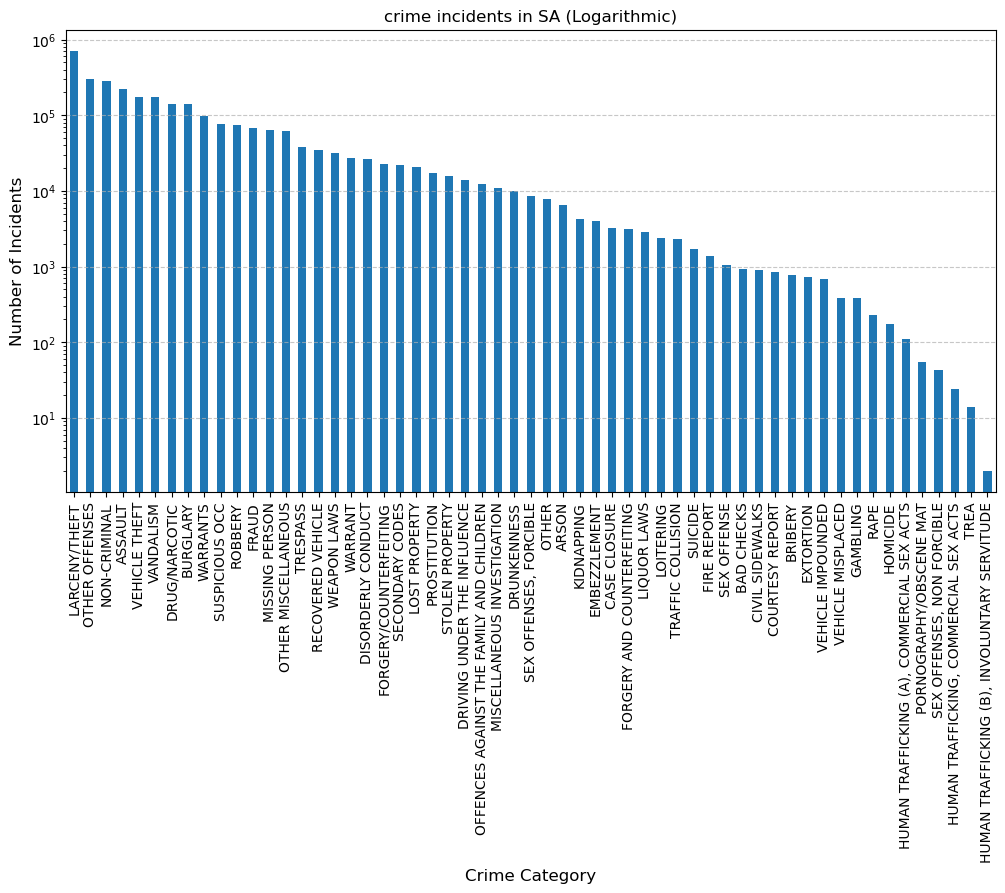

In [4]:
logplot = df.Category.value_counts()

plt.figure(figsize=(12,6))
logplot.plot(kind="bar")

plt.title("crime incidents in SA (Logarithmic)")
plt.xlabel("Crime Category", fontsize=12)
plt.ylabel("Number of Incidents", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.yscale(value="log")
plt.show()


###  Comments

It becomes clear tha the relationship across the crime categories is exponential. Also especially the lower-count crimes become easier to inspect, as in the other graph the larcency/theft was dominating all the other crimes, making it look like that f.i. there were almost no counts of suicide. But when we see the relationship like this, it's easier to see that there are quite many suicidal incidents.

In [16]:
df.Category.unique()

array(['ROBBERY', 'VEHICLE THEFT', 'ARSON', 'ASSAULT', 'TRESPASS',
       'BURGLARY', 'LARCENY/THEFT', 'WARRANTS', 'OTHER OFFENSES',
       'DRUG/NARCOTIC', 'SUSPICIOUS OCC', 'LIQUOR LAWS', 'VANDALISM',
       'WEAPON LAWS', 'NON-CRIMINAL', 'MISSING PERSON', 'FRAUD',
       'SEX OFFENSES, FORCIBLE', 'SECONDARY CODES', 'DISORDERLY CONDUCT',
       'RECOVERED VEHICLE', 'KIDNAPPING', 'FORGERY/COUNTERFEITING',
       'PROSTITUTION', 'DRUNKENNESS', 'BAD CHECKS',
       'DRIVING UNDER THE INFLUENCE', 'LOITERING', 'STOLEN PROPERTY',
       'SUICIDE', 'BRIBERY', 'EXTORTION', 'EMBEZZLEMENT', 'GAMBLING',
       'PORNOGRAPHY/OBSCENE MAT', 'SEX OFFENSES, NON FORCIBLE', 'TREA',
       'LOST PROPERTY', 'OTHER MISCELLANEOUS', 'OTHER', 'RAPE',
       'FIRE REPORT', 'WARRANT', 'TRAFFIC COLLISION',
       'MISCELLANEOUS INVESTIGATION', 'CASE CLOSURE', 'SEX OFFENSE',
       'FORGERY AND COUNTERFEITING', 'VEHICLE MISPLACED',
       'OFFENCES AGAINST THE FAMILY AND CHILDREN', 'VEHICLE IMPOUNDED',
       'C

In [21]:
# only consider theft
df_theft = df[(df.Category.str.contains("THEFT"))]
# following the week5_binning tutorial
# remove outlier data
df_theft = df_theft[(df_theft.Latitude < 50) & (df_theft.Longitude < -122)]

In [10]:
# compute distance between lon / lat coordinates using haversine formula
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return (c * r) * 10 # multiply by 10 to get in per 100meters instead of KM

In [22]:
# the square that incapsulates our data in SF
lat_min = df_theft.Latitude.min()
lat_max = df_theft.Latitude.max()
lon_min = df_theft.Longitude.min()
lon_max = df_theft.Longitude.max()

# calculating the bins we need to get 100m x 100m

# Distances along the latitude is always the same even when we change the longitude
print(f"Estimated bin amount along the western border of San Fransisco: {haversine(lon_min, lat_min, lon_min, lat_max)}") 
print(f"Estimated bin amount along the eastern border of San Fransisco: {haversine(lon_max, lat_min, lon_max, lat_max)}")

Estimated bin amount along the western border of San Fransisco: 135.8169965782169
Estimated bin amount along the eastern border of San Fransisco: 135.8169965782169


In [23]:
# Distance along the longitude changes depending on the latitude as also seen below.
print(f"Estimated bin amount along the northern border of San Fransisco: {haversine(lon_min, lat_max, lon_max, lat_max)}")
print(f"Estimated bin amount along the southern border of San Fransisco: {haversine(lon_min, lat_min, lon_max, lat_min)}")
# Imagine moving 90 degrees when you're close to the north pole. 
# You are not moving a lot of kilometers. Moving 90 degrees a long equator though, 
# that is a long walk!
# Since San Fransisco is relatively small in the big picture the difference is not 
# that big as we can see, so we just assume it's flat even though we clearly see it is not.

Estimated bin amount along the northern border of San Fransisco: 131.65315437892735
Estimated bin amount along the southern border of San Fransisco: 131.87079137226186


We need approximately $131 \times 135$ bins to get bins of approximately $100m \times 100m$

In [ ]:
count, lon, lat = np.histogram2d(df_theft.Longitude, df_theft.Latitude, bins=[131, 135])

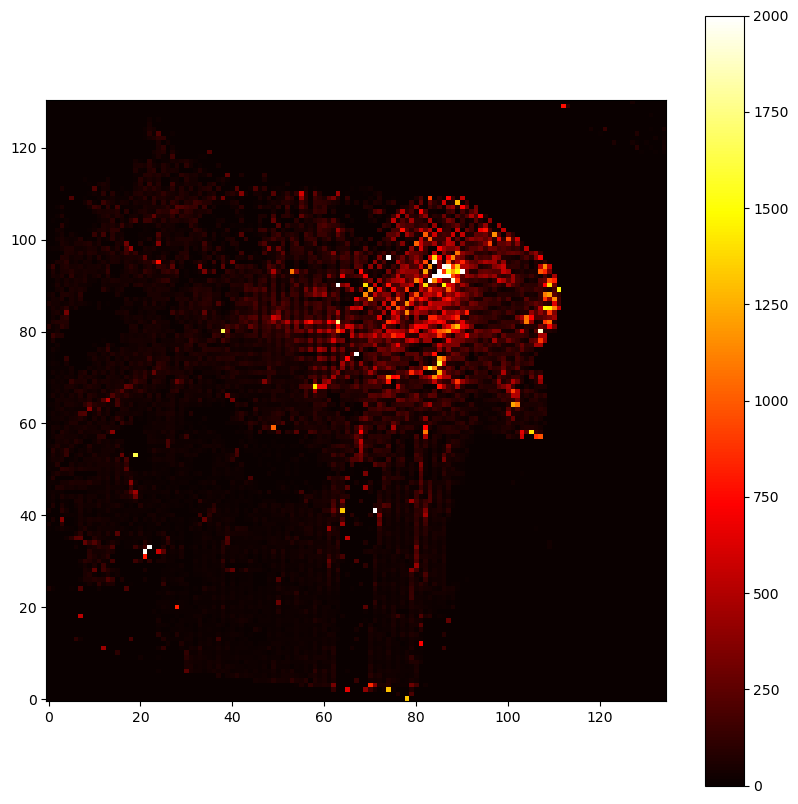

In [42]:
plt.figure(figsize=(10,10))
plt.imshow(count, cmap='hot', vmax=2000, origin='lower')
cb = plt.colorbar()

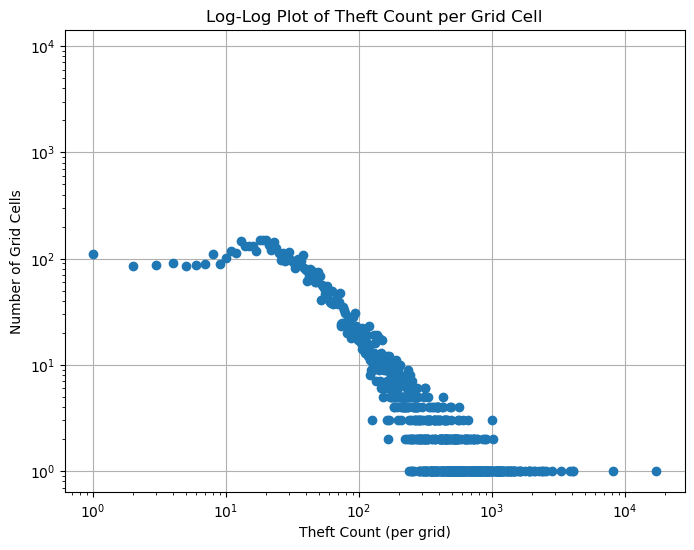

In [48]:
# Compute bin centers instead of edges (midpoints of each bin)
lon_centers = (lon[:-1] + lon[1:]) / 2
lat_centers = (lat[:-1] + lat[1:]) / 2

# Create a meshgrid of coordinates
lon_mesh, lat_mesh = np.meshgrid(lon_centers, lat_centers)

# Flatten everything for a DataFrame
df_grid = pd.DataFrame({
    "Longitude": lon_mesh.ravel(),
    "Latitude": lat_mesh.ravel(),
    "Theft_Count": count.ravel()  # Number of thefts per grid square
})

plt.figure(figsize=(8,6))
plt.loglog(df_grid["Theft_Count"].value_counts().sort_index(), 'o')
plt.xlabel("Theft Count (per grid)")
plt.ylabel("Number of Grid Cells")
plt.title("Log-Log Plot of Theft Count per Grid Cell")
plt.grid()
plt.show()

In [57]:
theft_counts = count.ravel()

# Get frequency of each theft count (N(k))
# Nk[0] = no. of areas with 0 theft count. Nk[1] = no. of areas with 1 theft count ...
Nk = np.bincount(theft_counts.astype(int))

# Create k values (shifted for k+1 axis)
k_values = np.arange(len(Nk)) + 1


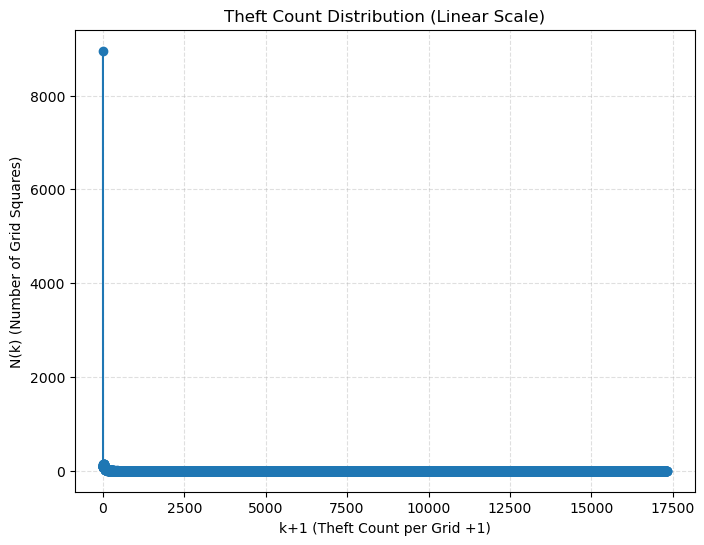

In [86]:
#Since log(0) is undefined, we plot k+1 instead of k. 
# This shows the distribution without log-scaling.

plt.figure(figsize=(8,6))
plt.plot(k_values, Nk, 'o-')
plt.xlabel("k+1 (Theft Count per Grid +1)")
plt.ylabel("N(k) (Number of Grid Squares)")
plt.title("Theft Count Distribution (Linear Scale)")
plt.grid(alpha=0.4, linestyle='--')
plt.show()


Obviously it's impossible to see anything from this plot (like with the whale example), so we need to do a log log plot

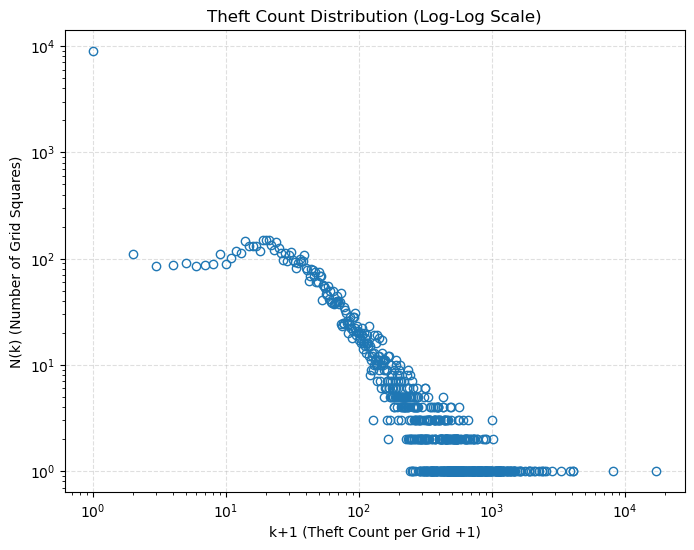

In [87]:
# test for power-law distribution
plt.figure(figsize=(8,6))
plt.loglog(k_values, Nk, 'o', fillstyle='none')
plt.xlabel("k+1 (Theft Count per Grid +1)")
plt.ylabel("N(k) (Number of Grid Squares)")
plt.title("Theft Count Distribution (Log-Log Scale)")
plt.grid(alpha=0.4, linestyle='--')
plt.show()

In [ ]:
# something from GPT to check if there is a power-law distribution. if R^2  is close to 1, the power law is a good fit.

log_k = np.log(k_values[Nk > 0])  # Avoid log(0)
log_Nk = np.log(Nk[Nk > 0])

slope, intercept, r_value, _, _ = linregress(log_k, log_Nk)
print(f"Power-Law Fit: Slope = {slope:.2f}, R² = {r_value**2:.2f}")

Power-Law Fit: Slope = -1.14, R² = 0.82


### Step 6: Answer the question. Was Sune correct in assuming that there is a power-law distribution of theft?

Yes, there seems to be a power-law distribution of theft. You can see that the theft count increases on some of the grid squares. 

## Part 2: Linear Regression

So, now it's time for fun with standard linear regression! We'll get into that by asking the following question.

> *Which pair of the 10 focus crimes have the the most similar temporal pattern across the week? (And which pair is most dissimilar).*

In [114]:
import utils
df_focus = utils.get_df_focused_crimes()
df_focus.head()
df_focus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1701423 entries, 0 to 1701422
Data columns (total 11 columns):
 #   Column      Dtype         
---  ------      -----         
 0   FullDate    datetime64[ns]
 1   FullTime    object        
 2   Category    object        
 3   PdDistrict  object        
 4   Longitude   float64       
 5   Latitude    float64       
 6   TimeOfDay   int64         
 7   DayOfWeek   object        
 8   DayOfMonth  int64         
 9   Month       object        
 10  Year        int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 142.8+ MB


One way to answer this question is to plot the activity for all pairs of crimetypes as scatter plot per pair. One crime type on each axis, and where each point in the scatter corresponds to an hour of the week, and the number of crimes of crime-type 1 is on the $x$-axis and the number of crimes of crime-type 2 is on the $y$-axis. (So there will be 168 points in each scatterplot.) If we look at 10 focus crimes that results in 45 pairwise comparisons. 

*Exercise*: Create the 91 scatterplots.
> * Display the plots in a $5$ by $9$ subplot matrix. You can use matplotlib's `subplot` to organize those plots. With $5$ across and $9$ down, you should be able to squeeze them all onto a single [a4](https://en.wikipedia.org/wiki/ISO_216#A_series) page.
>     * Make sure to label each one with the two crime-types you're comparing so we can easily inspect visually.
>     * Make sure that that you squeeze the subplots closely together so each plot can be as big as possible. 
> * Just inspecting this matrix, which crime-types look correlated and which one look like they're very different?

<div class="alert alert-block alert-info">
It's OK to use your LLM for all aspects this exercise.
</div>

In [115]:
# Define the order of days
day_to_index = {
    'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3,
    'Friday': 4, 'Saturday': 5, 'Sunday': 6
}

# Convert 'DayOfWeek' to numerical index
df_focus['DayOfWeekIndex'] = df_focus['DayOfWeek'].map(day_to_index)

# Compute 'HourOfWeek' using the formula
df_focus['HourOfWeek'] = (df_focus['DayOfWeekIndex'] * 24) + df_focus['TimeOfDay']

df_focus.head()

,FullDate,FullTime,Category,PdDistrict,Longitude,Latitude,TimeOfDay,DayOfWeek,DayOfMonth,Month,Year,DayOfWeekIndex,HourOfWeek
0,2004-11-22,17:50,ROBBERY,INGLESIDE,-122.420084,37.708311,17,Monday,22,November,2004,0,17
1,2005-10-18,20:00,VEHICLE THEFT,PARK,-120.500000,90.000000,20,Tuesday,18,October,2005,1,44
2,2004-02-15,02:00,VEHICLE THEFT,SOUTHERN,-120.500000,90.000000,2,Sunday,15,February,2004,6,146
3,2010-11-21,17:00,ASSAULT,SOUTHERN,-122.410541,37.770913,17,Sunday,21,November,2010,6,161
4,2013-04-02,15:50,ASSAULT,TARAVAL,-122.470366,37.745158,15,Tuesday,2,April,2013,1,39


In [149]:
df_hour_of_week = df_focus.groupby(["HourOfWeek", "Category"]).size().unstack()
df_hour_of_week

Category,ASSAULT,BURGLARY,DRUG/NARCOTIC,LARCENY/THEFT,PROSTITUTION,ROBBERY,STOLEN PROPERTY,VANDALISM,VEHICLE THEFT,WEAPON LAWS
HourOfWeek,,,,,,,,,,
0,1455,945,581,3669,143,485,106,1321,875,214
1,1116,600,362,1847,85,468,64,803,530,144
2,1032,717,295,1301,68,432,46,728,400,134
3,507,835,201,1035,52,240,61,593,326,106
4,428,836,165,815,36,203,53,430,237,64
...,...,...,...,...,...,...,...,...,...,...
163,1734,766,743,5756,35,520,97,1377,1536,228
164,1641,829,579,5346,24,613,80,1474,1747,206
165,1711,828,597,4429,42,653,79,1513,1711,232


> [Nice tutorial on how to plot A4 pages](https://vincent.bernat.ch/en/blog/2011-plot-benchmark-results-matplotlib)

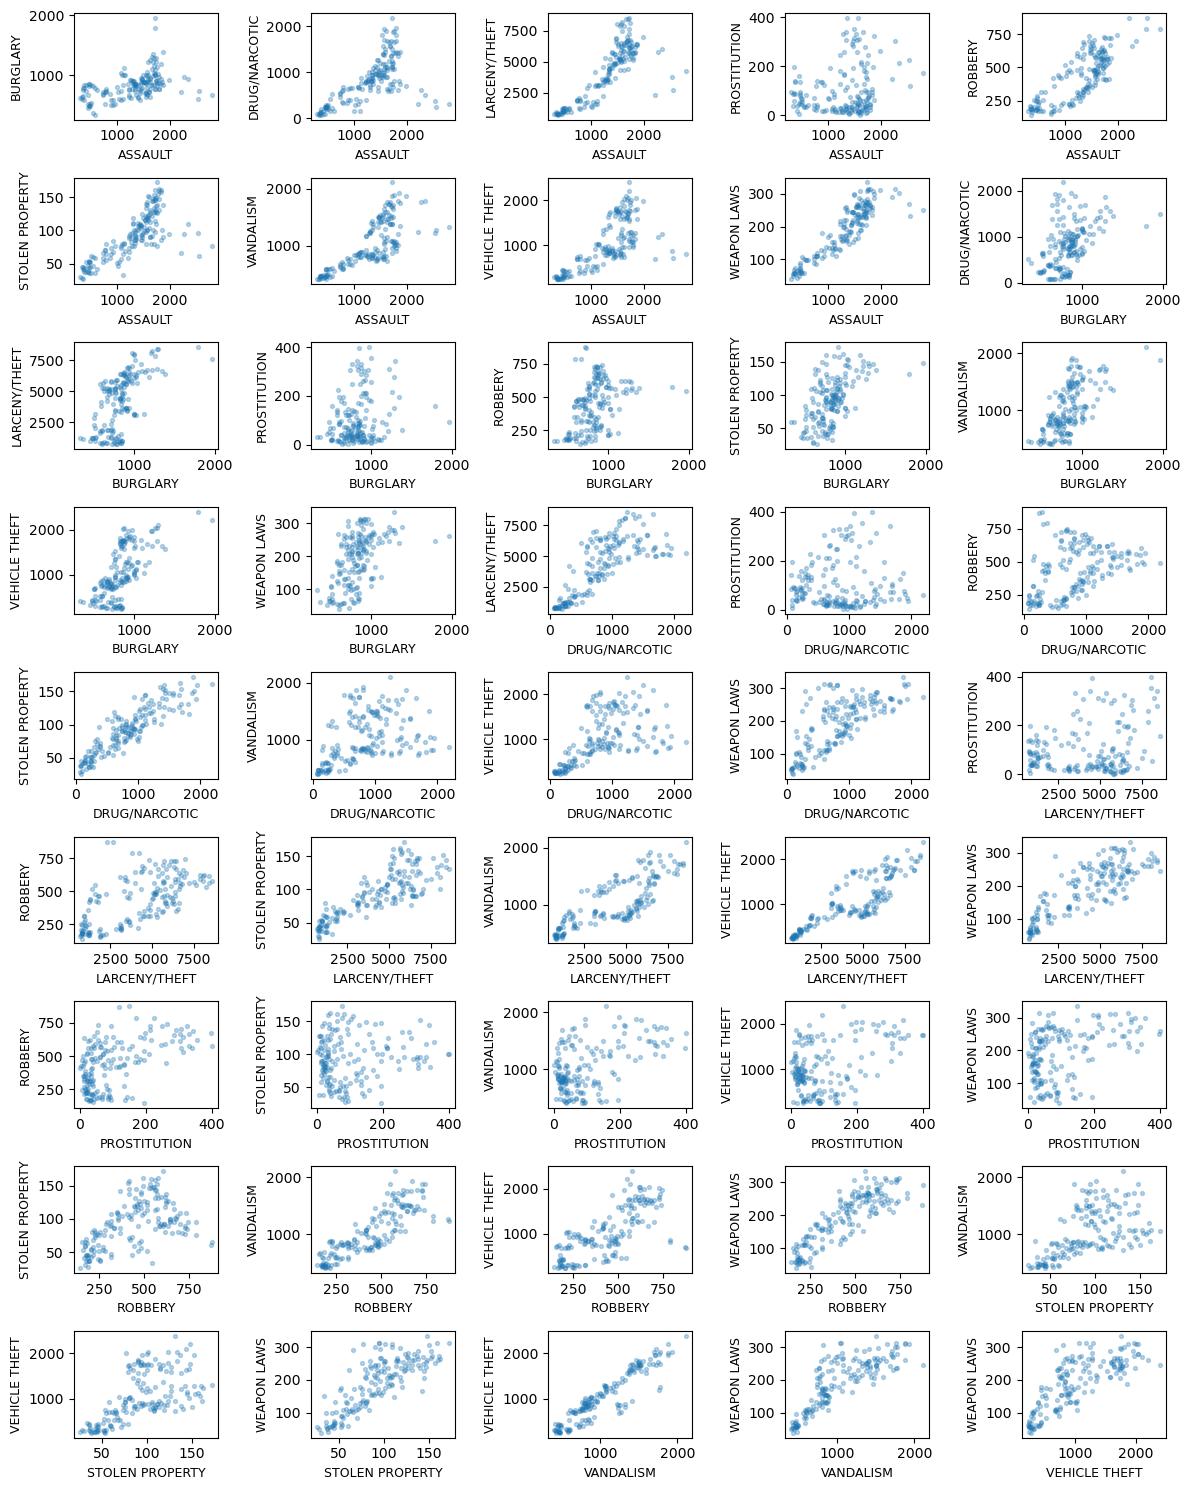

In [186]:
import itertools


# List of the 10 focus crime categories (these should match your dataframe column names)
crime_categories = df_hour_of_week.columns

# Create a 9x5 grid of subplots for the 45 unique pairs
fig, ax = plt.subplots(nrows=9, ncols=5, figsize=(12, 15),)

# Flatten the axes array to easily access each subplot
ax = ax.flatten()

# Get all unique pairs of crime categories
pairs = list(itertools.combinations(crime_categories, 2))

# Loop through each pair and plot the corresponding scatter plot
for i, (crime1, crime2) in enumerate(pairs):
    # Get the data for the two crime categories at each hour of the week
    x = df_hour_of_week[crime1]
    y = df_hour_of_week[crime2]
    
    # Plot on the corresponding subplot
    ax[i].scatter(x, y, s=8, alpha=0.3)  # alpha to make points slightly transparent
    ax[i].set_xlabel(crime1, fontsize=9)
    ax[i].set_ylabel(crime2, fontsize=9)
    
# Show the plot
plt.tight_layout()
plt.show()

### Comments on the plots

Looking at these plots, we can analyse them with the examples that were provided in DAOST chapter 3, figure 3-3.

### Strong, simple relationship

> A strong simple relationship, is when there is a linear'ish xy plot on the dataset.

These include (some of them):

- Assault / Weapon laws
- Robbbery / Weapon laws
- Vandalism / Weapon laws
- Vandalism / Vehicle theft
- Assault / Robbery (a bit, but also a bit multivariete?)
- Burglary / Vehicle theft
- Drug/Narcotic / Stolen property
- Larcency theft / Stolen property

### Multivariate relationship

> A linearish line, which splits into two different directions at some point

- Assault / Drug narcotic
- Robbery / Stolen property
- Prostitution / Drug/narcotic (a bit)

And then there are some interesting ones, which separate, and then get back together

- Larcency theft / Vehicle theft
- Larcency theft / Vandalism
- Assault / Robbery

### No relationship

> Just a clutter of splashes

- Actually most of the prostitution plots

### Strong, not simple relationship

- Maybe vandalism / weapon laws?


---

Next it's time for the linear regression. Janert writes about this on page 63-66. 

There is a closed-form solution for linear regression. If you want to find the best straight line $y = ax + b$ fit to a set of $N$ points $\{(x_1,y_1), (x_2,y_2), \ldots (x_N,y_N)\}$, the value of $b$ is

$$
\tag{1}
b = \langle y \rangle - a \langle x \rangle,
$$

where $\langle x \rangle = (1/N)\sum_i x_i$ is the mean value of the $x_i$ and $\langle y \rangle = (1/N)\sum_i x_i$ is the mean value of the $y_i$. 

And the value for the slope $a$ is 

$$
\tag{2}
a = \frac{\sum_{i=1}^N \left( x_iy_i \right) - N \langle x\rangle\langle y\rangle }{\sum_{i=1}^N\left( x_i^2 \right) - N\langle x\rangle^2}.
$$


A couple of years ago, I actually derived the whole thing. I've taken it out of the notebook. But if you'd like to take a look (it's a fun and instructive little exercise), you can find it **[here](https://github.com/suneman/socialdata2021/blob/main/lectures/LinearRegressionDerived.ipynb)**. 

We are going to focus on the fit for now, but keep in mind what we have learnt so far about the purpose of linear regression! 

*Exercise:* Linear regression. 

> * Using Equation 1 and 2 above, calculate the slopes for $a$ and $b$ in each case and add them to the plot. (You are free to compare the results with ones obtained using a package like `sklearn` to check that everything is working as expected.) <font color=gray>See if you can do this by yourself without LLM help</font>.
> * You can add even more information to this plot by coloring each point according to its hour of the week. So create a gradient going from one color to another, and color each point according to the gradient. (So let's say your two colors are red and blue, then the Sunday, midnight to 1am bin will be red and the following Sunday, 11pm - midnight bin will be blue). <font color=gray>It's OK use full LLM help here</font>
> * Do any patterns stand out as you inspect the plot? Mention one or two that catch your eye -- it may be both because the sequences are similar or because they are different, or something entirely different altogether.

<div class="alert alert-block alert-info">
See LLM comments in gray.
</div>

In [165]:
reg = linear_model.LinearRegression()
df_hour_of_week.head()

Category,ASSAULT,BURGLARY,DRUG/NARCOTIC,LARCENY/THEFT,PROSTITUTION,ROBBERY,STOLEN PROPERTY,VANDALISM,VEHICLE THEFT,WEAPON LAWS
HourOfWeek,,,,,,,,,,
0,1455,945,581,3669,143,485,106,1321,875,214
1,1116,600,362,1847,85,468,64,803,530,144
2,1032,717,295,1301,68,432,46,728,400,134
3,507,835,201,1035,52,240,61,593,326,106
4,428,836,165,815,36,203,53,430,237,64


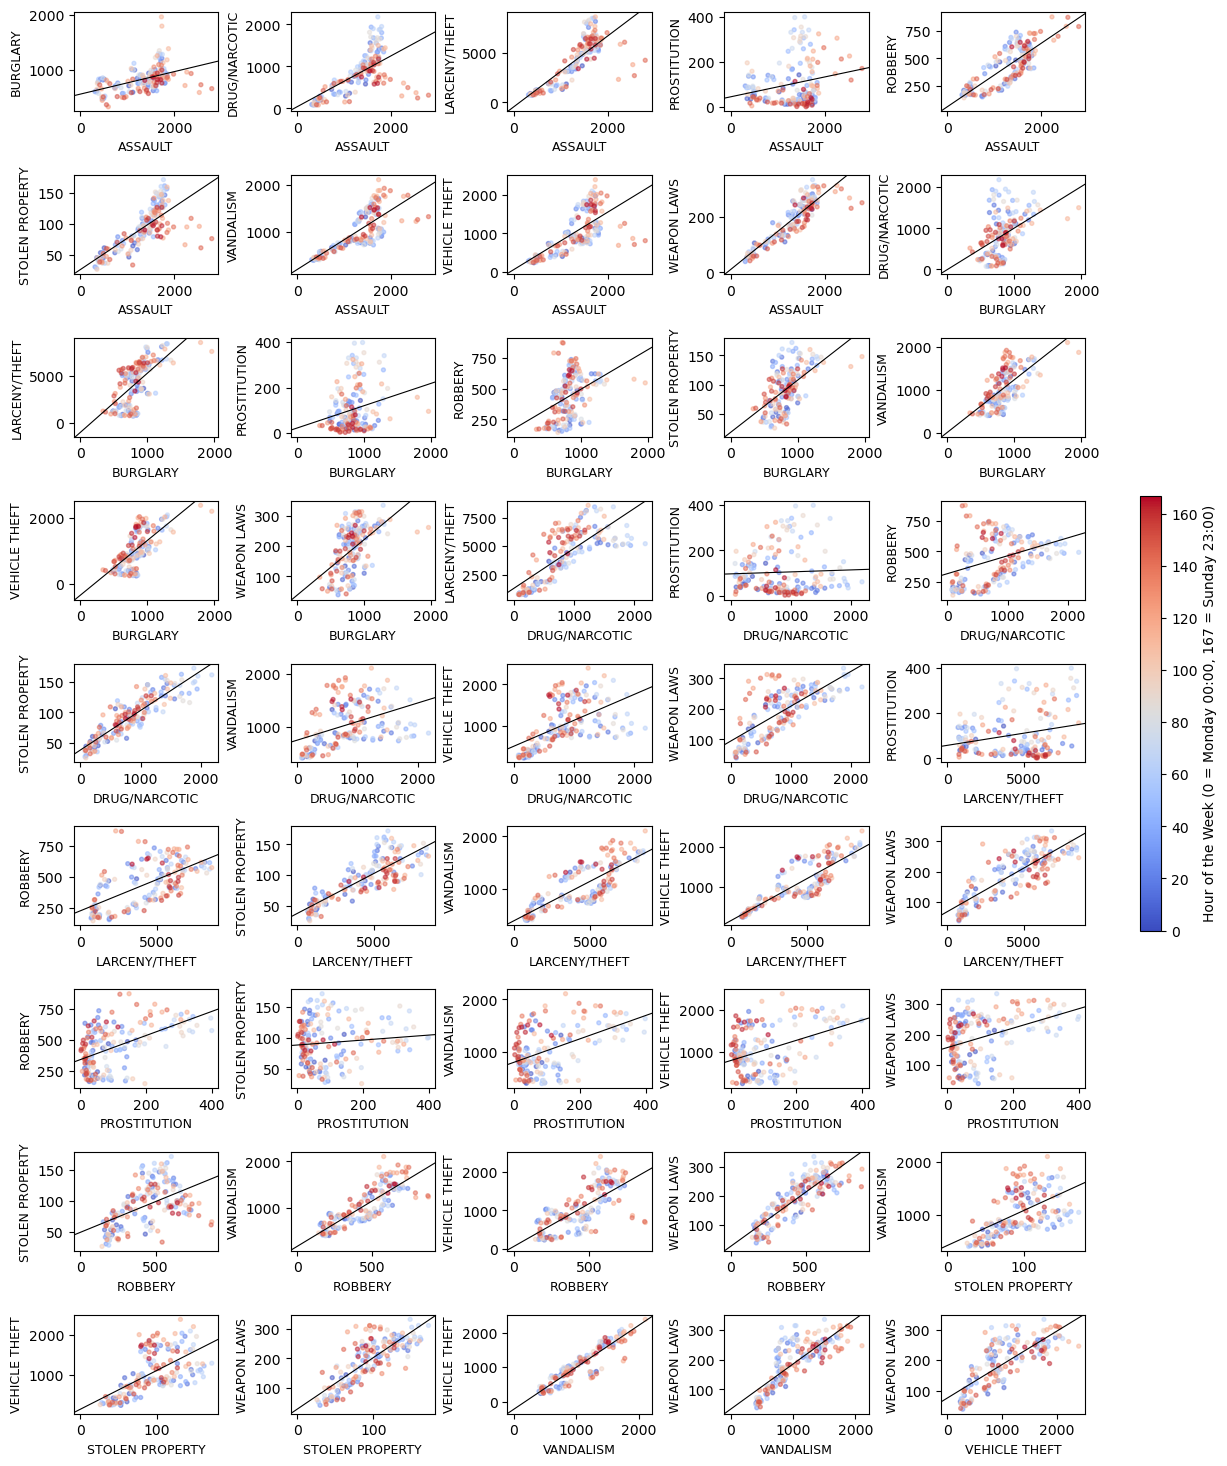

In [194]:
import matplotlib.colors as mcolors


# Define colormap
cmap = plt.cm.coolwarm  # Choose a color gradient from red to blue
norm = mcolors.Normalize(vmin=0, vmax=167)  # Normalize hours from 0 to 167

# Create a 9x5 grid of subplots for the 45 unique pairs
fig, ax = plt.subplots(nrows=9, ncols=5, figsize=(12, 15))
fig.tight_layout(pad=2.5)
ax = ax.flatten()

# Loop through each pair and plot the corresponding scatter plot
for i, (crime1, crime2) in enumerate(pairs):
    # Get the data for the two crime categories at each hour of the week
    x = df_hour_of_week[crime1].values.reshape(-1, 1) # X needs to be a 2D array
    y = df_hour_of_week[crime2].values # Y is a 1D array
    hours = df_hour_of_week.index.values  # Get hour of the week (0-167)

    
    # Fit Linear Regression Model
    model = linear_model.LinearRegression()
    model.fit(x, y)
    a = model.coef_[0]
    b = model.intercept_
    
    # Plot regression line
    #x_range = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)  # Generate points for line
    #y_pred = model.predict(x_range)
    ax[i].axline(xy1=(0, b), slope=a, color='k', lw=0.8)

    # Plot on the corresponding subplot
    ax[i].scatter(x, y, s=8, c=hours, cmap=cmap, norm=norm, alpha=0.5)  # alpha to make points slightly transparent
    ax[i].set_xlabel(crime1, fontsize=9)
    ax[i].set_ylabel(crime2, fontsize=9)
    

cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, orientation='vertical', fraction=0.02, pad=0.05)
cbar.set_label("Hour of the Week (0 = Monday 00:00, 167 = Sunday 23:00)")


# Show the plot
#plt.tight_layout()
plt.show()



### Comments on the plot

> I'm not sure how to read and analyse this data further with the colors, I'll need help for that.

I think it's interesting to bear in mind that some of the plots that I said had no relationship can still fit a line that makes it look like there is. I.e. prostitution and weapon laws. Of course you can always fit a linear line to some points, but it doesn't necessarily mean that the fit is good.

I really like how some of the lines are quite well fitted, i.e. vandalism and vehicle theft.

---

But the question we started with was "Which pair of focus crimes have the the most similar temporal pattern across the week?". We haven't really answered that yet. So let's calculate one last thing: $R^2$. 

Basically $R^2$ is a measures of how good a linear fit is. You can [read about $R^2$ on wikipedia](https://en.wikipedia.org/wiki/Coefficient_of_determination). 

*Exercise:* Goodness of fit as a measure of correlation. 
> * Write a little function to calculate $R^2$ alongside each linear fit. (Again you can compare it with a package to check that it works, e.g. the one provided by the function `score()` in `sklearn`.) <font color=gray>Try this without the help of an LLM.</font>
> * Explain the connection between $R^2$ and the [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient). <font color=gray>Try this without the help of an LLM, at least first. Then you may ask it to see if you got it right.</font>
> * **According to the fits and associated $R^2$**, which pair of crimes have the **most similar** temporal pattern. Discuss your finding: Does it make sense? Why?/Why not?
> * According to your fits and associated measure of $R^2$, which pair of crimes have the **most dissimilar** temporal pattern. Discuss your finding: Does it make sense? Why?/Why not? Does it corresponds with your observations from the previous exercise?
> * Create a final mega-plot with all of the 91 megaplots, fits, and $R^2$ value written as [text](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html) on each plot. In this figure, you should also find a way to visually highlight the two most similar/dissimilar crimes. <font color=gray>Totally fine to use an LLM to help you organize the plot and make it look amazing.</font>


<div class="alert alert-block alert-info">
See LLM comments in gray.
</div>

In [202]:
# Dictionary to store R² values
r2_scores = {}

# Loop through each pair and plot the corresponding scatter plot
for i, (crime1, crime2) in enumerate(pairs):
    # Get the data for the two crime categories at each hour of the week
    x = df_hour_of_week[crime1].values.reshape(-1, 1) # X needs to be a 2D array
    y = df_hour_of_week[crime2].values # Y is a 1D array
    hours = df_hour_of_week.index.values  # Get hour of the week (0-167)

    # Fit Linear Regression Model
    model = linear_model.LinearRegression()
    model.fit(x, y)

    r2 = round(model.score(x, y), 3)
    r2_scores[(crime1, crime2)] = r2

In [203]:
most_similar = max(r2_scores, key=r2_scores.get)
most_dissimilar = min(r2_scores, key=r2_scores.get)

print(f"Most Similar Crime Pair: {most_similar} (R² = {r2_scores[most_similar]})")
print(f"Most Dissimilar Crime Pair: {most_dissimilar} (R² = {r2_scores[most_dissimilar]})")

Most Similar Crime Pair: ('VANDALISM', 'VEHICLE THEFT') (R² = 0.866)
Most Dissimilar Crime Pair: ('DRUG/NARCOTIC', 'PROSTITUTION') (R² = 0.002)


It makes sense that the most similar crime pair is vandalism / vehicle theft. As we look at the plot we can see that there is a strong simple relationship between the two crimes. It also makes sense that you might have made some damage to a car for instance when stealing it.

I was actually a bit surprised with drug/narcotic and prostitution to be the most dissimilar crime pair. I would assume that they were related, but as we look at the plot we can also see that they kind of go in two divergent ways. So I guess it makes sense.

> TODO: create the megaplot